# k-Nearest Neighbors Regression

 KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. 

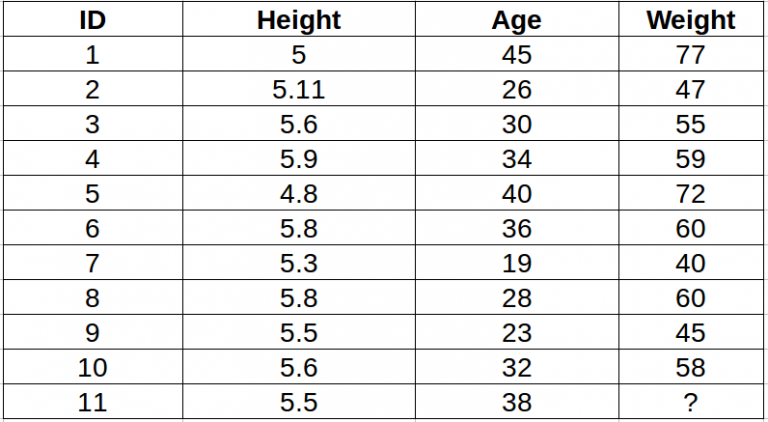

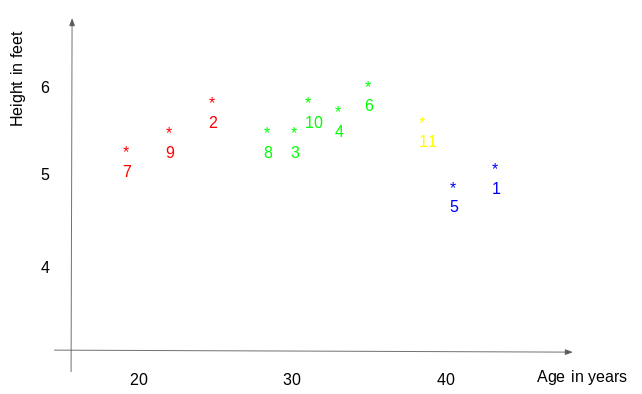

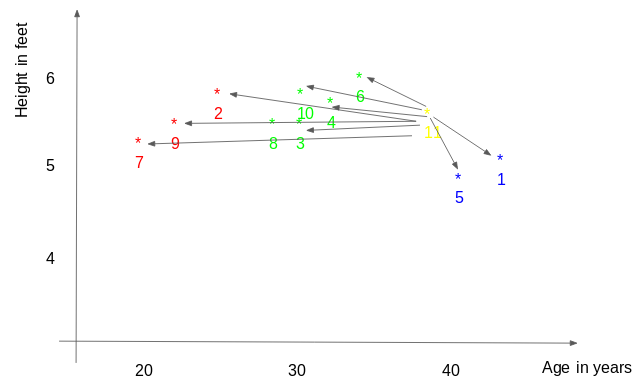

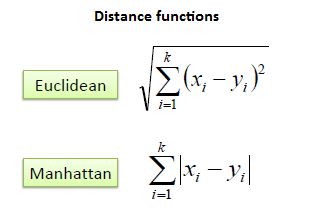

 The closest k data points are selected (based on the distance). In this example, points 1, 5, 6 will be selected if the value of k is 3

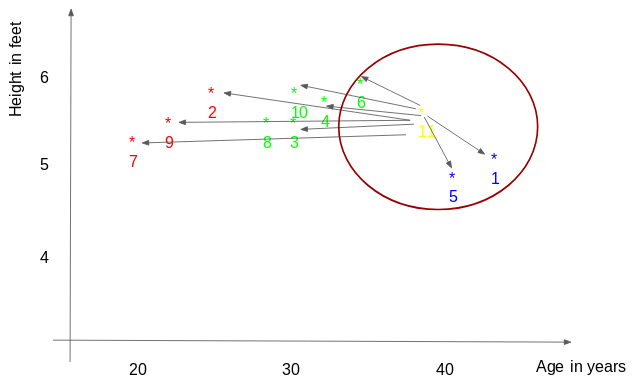

 The average of these data points is the final prediction for the new point. Here, we have weight of ID11 = (77+72+60)/3 = 69.66 kg.

## How to choose the k factor?
The second step is to select the k value. This determines the number of neighbors we look at when we assign a value to any new observation.

In our example, for a value k = 3, the closest points are ID1, ID5 and ID6.

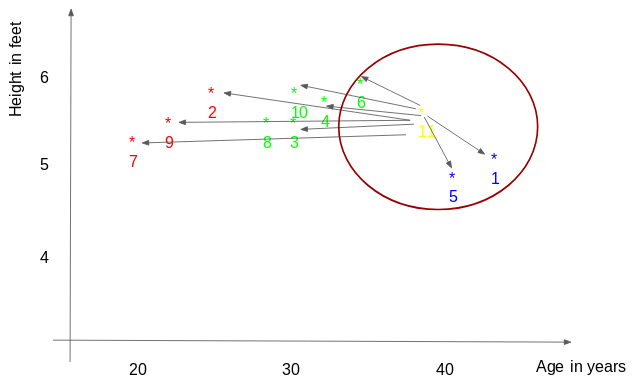

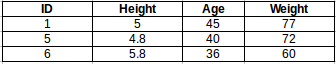

ID11 = (77+72+60)/3 

ID11 = 69.66 kg

For the value of k=5, the closest point will be ID1, ID4, ID5, ID6, ID10.

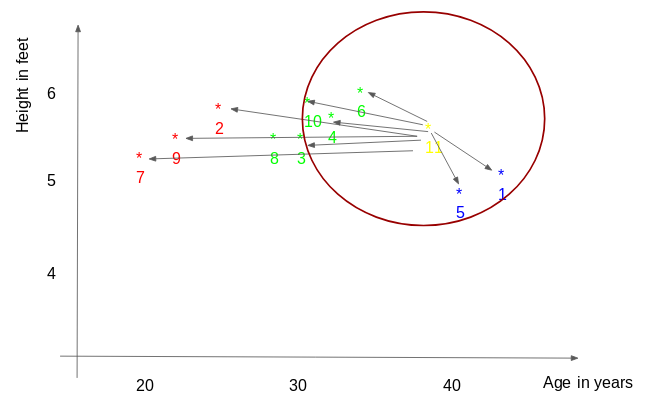

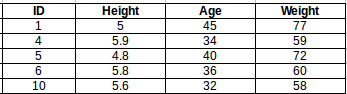

ID 11 =  (77+59+72+60+58)/5 

ID 11 = 65.2 kg

We notice that based on the k value, the final result tends to change. Then how can we figure out the optimum value of k?

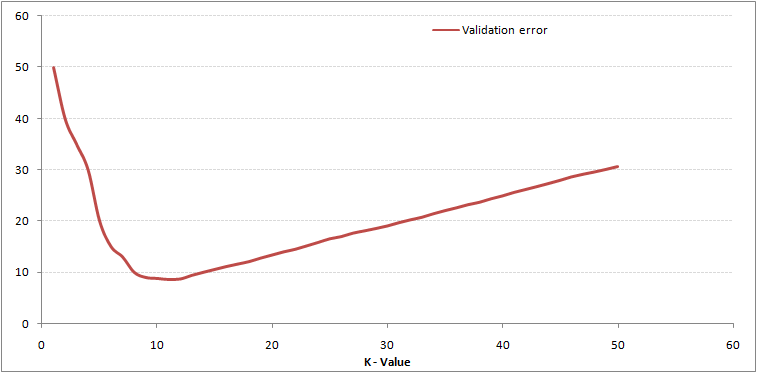

# Practical example

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\py\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\py\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\py\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\py\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\py\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed t

In [84]:
data = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\DataSoCool\7. ML7 KNN regression and classification\PRSA_data.csv')

In [85]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.00,1021.00,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.00,1020.00,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.00,1019.00,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.00,1019.00,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.00,1018.00,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.00,-23,-2.00,1034.00,NW,231.97,0,0
43820,43821,2014,12,31,20,10.00,-22,-3.00,1034.00,NW,237.78,0,0
43821,43822,2014,12,31,21,10.00,-22,-3.00,1034.00,NW,242.70,0,0
43822,43823,2014,12,31,22,8.00,-22,-4.00,1034.00,NW,246.72,0,0


In [86]:
data.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [87]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.00,43824.00,43824.00,43824.00,43824.00,41757.00,43824.00,43824.00,43824.00,43824.00,43824.00,43824.00
mean,21912.50,2012.00,6.52,15.73,11.50,98.61,1.82,12.45,1016.45,23.89,0.05,0.19
std,12651.04,1.41,3.45,8.80,6.92,92.05,14.43,12.20,10.27,50.01,0.76,1.42
min,1.00,2010.00,1.00,1.00,0.00,0.00,-40.00,-19.00,991.00,0.45,0.00,0.00
25%,10956.75,2011.00,4.00,8.00,5.75,29.00,-10.00,2.00,1008.00,1.79,0.00,0.00
50%,21912.50,2012.00,7.00,16.00,11.50,72.00,2.00,14.00,1016.00,5.37,0.00,0.00
75%,32868.25,2013.00,10.00,23.00,17.25,137.00,15.00,23.00,1025.00,21.91,0.00,0.00
max,43824.00,2014.00,12.00,31.00,23.00,994.00,28.00,42.00,1046.00,585.60,27.00,36.00


In [88]:
data.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [89]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [90]:
data = data.replace(np.nan, np.mean(data[['pm2.5']]))
data.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'PRES',
        'Iws', 'Is', 'Ir']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,26469.89,year
1,5.14,month
2,4.23,day
3,3.80,hour
4,2.45,pm2.5
5,3.16,DEWP
6,26550.91,PRES
7,1.42,Iws
8,1.02,Is
9,1.04,Ir


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['month', 'day', 'hour', 'pm2.5', 'DEWP',
        'Iws', 'Is', 'Ir']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.39,month
1,3.25,day
2,2.93,hour
3,2.11,pm2.5
4,1.21,DEWP
5,1.38,Iws
6,1.01,Is
7,1.04,Ir


In [93]:
inputs = data[['month', 'day', 'hour', 'pm2.5', 'DEWP', 'Iws', 'Is', 'Ir']]
targets = data['TEMP']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [95]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

KNeighborsRegressor()

In [96]:
y_pred = reg.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

4.564833449846614


In [98]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y1_pred=model.predict(X_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,y1_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.345582696868793
RMSE value for k=  2 is: 4.78956134884424
RMSE value for k=  3 is: 4.643739565977535
RMSE value for k=  4 is: 4.56655077975356
RMSE value for k=  5 is: 4.564833449846614
RMSE value for k=  6 is: 4.561781627100477
RMSE value for k=  7 is: 4.582760422692758
RMSE value for k=  8 is: 4.62193604137411
RMSE value for k=  9 is: 4.656081728485416
RMSE value for k=  10 is: 4.67938188901767
RMSE value for k=  11 is: 4.706150634039967
RMSE value for k=  12 is: 4.733080040127562
RMSE value for k=  13 is: 4.755154187519251
RMSE value for k=  14 is: 4.771726094631893
RMSE value for k=  15 is: 4.787076678913846
RMSE value for k=  16 is: 4.811624514947493
RMSE value for k=  17 is: 4.828528267095796
RMSE value for k=  18 is: 4.848605618565804
RMSE value for k=  19 is: 4.8672259893587455
RMSE value for k=  20 is: 4.8849636162752335


<AxesSubplot:>

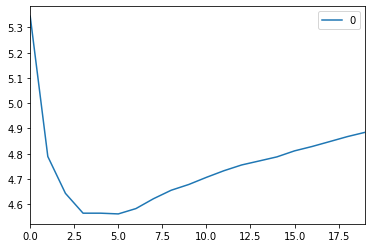

In [186]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [187]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 6}

In [192]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

params = {'n_neighbors': n_neighbors}

knn = neighbors.KNeighborsRegressor()

model = RandomizedSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 6, 'leaf_size': 34}

In [193]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=6)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=34, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [194]:
y1_pred = reg.predict(X_test)

In [195]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

4.564727814405346


## Logistics dataset

In [54]:
import pandas as pd

logistics = pd.read_excel(r'C:\Users\Nutzer\OneDrive\Desktop\DataSoCool\7. ML7 KNN regression and classification\Daily_Demand_Forecasting_Orders_reg.xls')

In [55]:
targets = logistics['Target (Total orders)']

inputs = logistics.drop(['Target (Total orders)'],axis=1)

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [57]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [58]:
y_pred = reg.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn import metrics

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

81.11152672994963


In [61]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y1_pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y1_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 64.83347450841528
RMSE value for k=  2 is: 66.79614400453816
RMSE value for k=  3 is: 73.76026178531967
RMSE value for k=  4 is: 75.92786832912674
RMSE value for k=  5 is: 81.11152672994963
RMSE value for k=  6 is: 83.38754478805629
RMSE value for k=  7 is: 87.51199471243541
RMSE value for k=  8 is: 87.59135054243458
RMSE value for k=  9 is: 89.27875188271042
RMSE value for k=  10 is: 88.15803531418733
RMSE value for k=  11 is: 91.08409438580347
RMSE value for k=  12 is: 91.86211435868388
RMSE value for k=  13 is: 93.06935959617965
RMSE value for k=  14 is: 94.81748604684263
RMSE value for k=  15 is: 96.33312922569687
RMSE value for k=  16 is: 97.06064057682995
RMSE value for k=  17 is: 99.00590570165245
RMSE value for k=  18 is: 99.72603595928587
RMSE value for k=  19 is: 100.83512354526324
RMSE value for k=  20 is: 102.38689148578989


In [62]:
# RMSE Search
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [64]:
y2_pred = reg.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn import metrics

rmse = (np.sqrt(mean_squared_error(y_test, y2_pred)))
print(rmse)

64.83347450841528


In [78]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]

params = {'n_neighbors': n_neighbors, 'leaf_size':leaf_size, 'algorithm':algorithm}

knn = neighbors.KNeighborsRegressor()

model = RandomizedSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7, 'leaf_size': 1, 'algorithm': 'kd_tree'}

In [79]:
# randomizer search
reg = KNeighborsRegressor(n_neighbors=7, leaf_size=1,algorithm='kd_tree')
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=1, n_neighbors=7)

In [80]:
y1_pred = reg.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn import metrics

rmse = (np.sqrt(mean_squared_error(y_test, y1_pred)))
print(rmse)

87.51199471243541


In [81]:
# by default accuracy
errors1 = abs(y_pred - y_test)

# Randomizer search
errors2 = abs(y1_pred - y_test)

# rmse search
errors3 = abs(y2_pred - y_test)

In [82]:
mape1 = 100 * (errors1 / y_test)
mape2 = 100 * (errors2 / y_test)
mape3 = 100 * (errors3 / y_test)

accuracy1 = 100 - np.mean(mape1)
accuracy2 = 100 - np.mean(mape2)
accuracy3 = 100 - np.mean(mape3)

print('Accuracy by default:', round(accuracy1, 2), '%.')
print('Accuracy by Randomizer Search:', round(accuracy2, 2), '%.')
print('Accuracy by RMSE search:', round(accuracy3, 2), '%.')


Accuracy by default: 84.7 %.
Accuracy by Randomizer Search: 83.45 %.
Accuracy by RMSE search: 85.32 %.


# k-Nearest Neighbors classifier

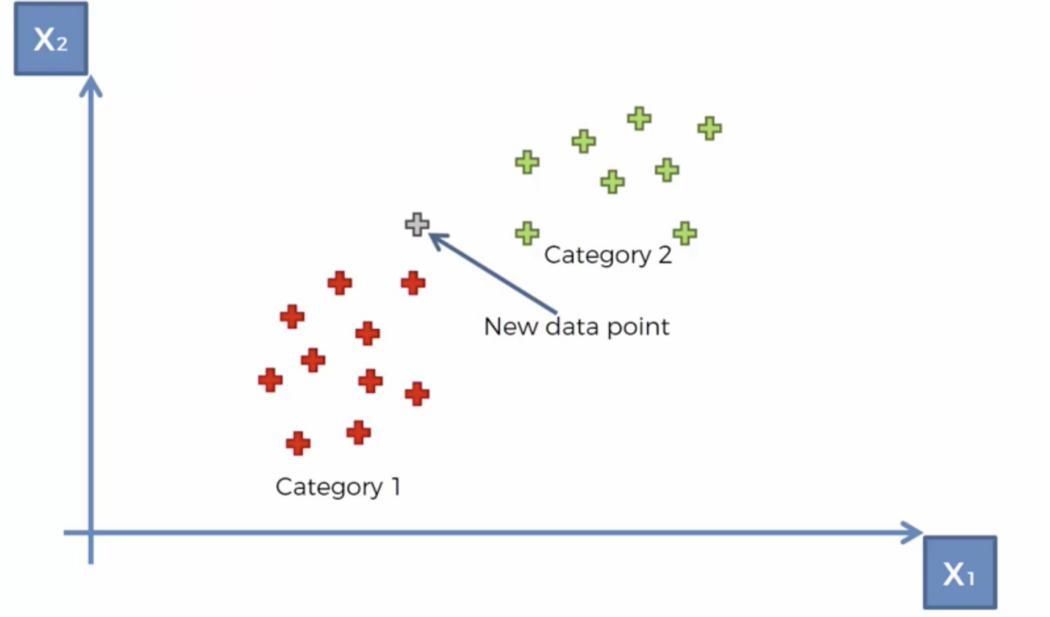

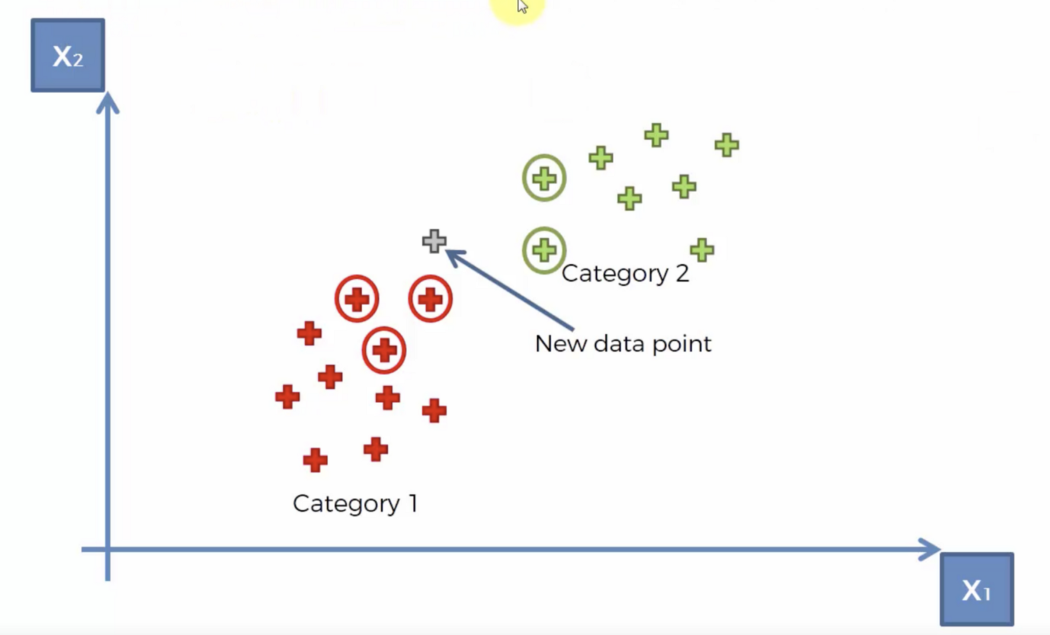

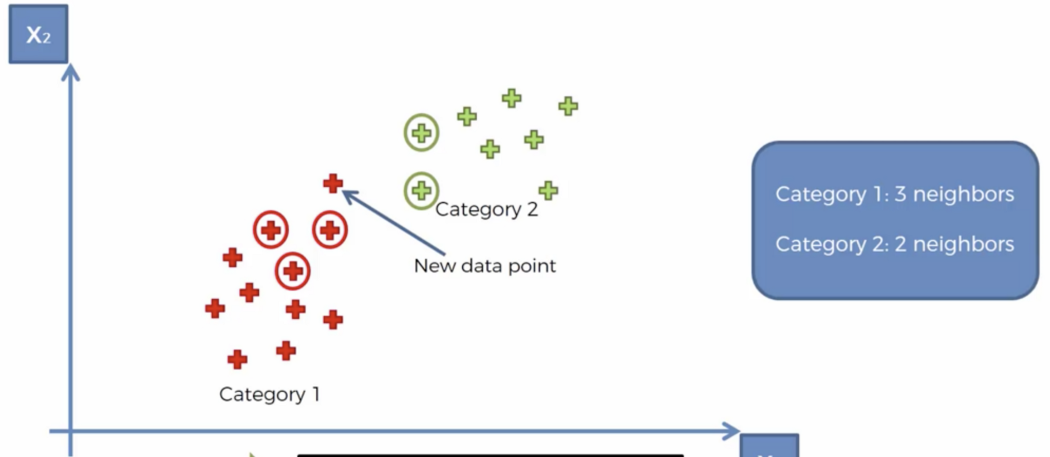

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [3]:
dataset = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\DataSoCool\7. ML7 KNN regression and classification\Social_Network_Ads.csv')


In [4]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
X = dataset[['Gender', 'Age', 'EstimatedSalary']]
y = dataset['Purchased']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

C:\py\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [21]:
cm

array([[52,  6],
       [ 7, 15]], dtype=int64)

In [22]:
ac

0.8375

In [276]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
leaf_size=[int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]

params = {'n_neighbors': n_neighbors, 'leaf_size':leaf_size}

knn = neighbors.KNeighborsClassifier()

model = RandomizedSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

C:\py\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 17, 'leaf_size': 89}

In [277]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17, leaf_size=89)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [278]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test, y_pred)
ac1 = accuracy_score(y_test,y_pred)

In [279]:
cm1

array([[54,  4],
       [ 8, 14]], dtype=int64)

In [280]:
ac1

0.85

In [263]:
# classification ucun rmse methodu islemir. sehv melumat verir
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y1_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y1_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4183300132670378
RMSE value for k=  2 is: 0.4609772228646444
RMSE value for k=  3 is: 0.4609772228646444
RMSE value for k=  4 is: 0.4183300132670378
RMSE value for k=  5 is: 0.4183300132670378
RMSE value for k=  6 is: 0.3535533905932738
RMSE value for k=  7 is: 0.3535533905932738
RMSE value for k=  8 is: 0.37080992435478316
RMSE value for k=  9 is: 0.37080992435478316
RMSE value for k=  10 is: 0.4031128874149275
RMSE value for k=  11 is: 0.33541019662496846
RMSE value for k=  12 is: 0.33541019662496846
RMSE value for k=  13 is: 0.3535533905932738
RMSE value for k=  14 is: 0.37080992435478316
RMSE value for k=  15 is: 0.4031128874149275
RMSE value for k=  16 is: 0.37080992435478316
RMSE value for k=  17 is: 0.3872983346207417
RMSE value for k=  18 is: 0.3872983346207417
RMSE value for k=  19 is: 0.3535533905932738
RMSE value for k=  20 is: 0.3872983346207417


In [281]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [282]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
ac2 = accuracy_score(y_test,y_pred)

In [283]:
cm2

array([[55,  3],
       [ 6, 16]], dtype=int64)

In [284]:
ac2

0.8875

In [289]:
print("ac by default",ac)
print("ac1 with Randomizer search",ac1)
print("ac2 with rmse search",ac2)

ac by default 0.825
ac1 with Randomizer search 0.85
ac2 with rmse search 0.8875


In [32]:
# load data
from sklearn import datasets

data = datasets.load_breast_cancer()

X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
from lazypredict.Supervised import LazyClassifier 
#LazyRegressor

In [34]:
clf = LazyClassifier(predictions=True)

In [35]:
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.05it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
Perceptron                         0.97               0.97     0.97      0.97   
AdaBoostClassifier                 0.97               0.97     0.97      0.97   
LogisticRegression                 0.97               0.97     0.97      0.97   
SGDClassifier                      0.96               0.97     0.97      0.97   
ExtraTreeClassifier                0.96               0.97     0.97      0.97   
CalibratedClassifierCV             0.97               0.97     0.97      0.97   
RandomForestClassifier             0.96               0.96     0.96      0.96   
LGBMClassifier              